In [18]:
import pandas as pd
import numpy as np

import plotly
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

from rdkit.Chem import PandasTools

In [19]:
# Set the default renderer to png as the data is huge and overwhelms the Javascript renderers
pio.renderers.default = 'png'

In [20]:
df = pd.read_csv('data/enalos/16/Enalos_data_41k.csv.gz')
df.head()

,ID,original SMILES,SMILES,InChI,InChIkey,Cytotoxicity_Classification,Cytotoxicity_Prediction,MSlogBCF_Regression,MSlogBCF_Prediction,MSlogBP_Regression,MSlogBP_Prediction,MSlogP_Regression,MSlogP_Prediction,MSlogS_Regression,MSlogS_Prediction,MSlogVP_Regression,MSlogVP_Prediction,Mutagenicity_Classification,Mutagenicity_Prediction
0,1,NC(=NO)NCCc1ccc(S(N)(=O)=O)cc1,NC(=NO)NCCC1CCC(CC1)S(N)(=O)=O,InChI=1S/C9H20N4O3S/c10-9(13-14)12-6-5-7-1-3-8...,NVZGDOFSLSXAPQ-UHFFFAOYSA-N,"""inactive""",reliable,0.280563,reliable,321.906070,reliable,-1.148561,reliable,-2.199614,reliable,-8.858482,reliable,"""negative""",reliable
1,2,N/C(=N\O)NCc1ccc(S(N)(=O)=O)cc1,NC(=NO)NCC1CCC(CC1)S(N)(=O)=O,InChI=1S/C8H18N4O3S/c9-8(12-13)11-5-6-1-3-7(4-...,YEDIJGDHJSMSCY-UHFFFAOYSA-N,"""inactive""",reliable,0.329665,reliable,332.172738,reliable,-1.411587,reliable,-1.906268,reliable,-9.084317,reliable,"""negative""",reliable
2,3,N/C(=N\O)c1cccc(S(N)(=O)=O)c1,NC(=NO)C1CCCC(C1)S(N)(=O)=O,InChI=1S/C7H15N3O3S/c8-7(10-11)5-2-1-3-6(4-5)1...,WJYCNEHVQIATHM-UHFFFAOYSA-N,"""inactive""",reliable,0.325793,reliable,296.076828,reliable,-1.508278,reliable,-1.832074,reliable,-9.511909,reliable,"""negative""",reliable
3,4,NC(=NO)NCc1ccc(S(N)(=O)=O)cc1,NC(=NO)NCC1CCC(CC1)S(N)(=O)=O,InChI=1S/C8H18N4O3S/c9-8(12-13)11-5-6-1-3-7(4-...,YEDIJGDHJSMSCY-UHFFFAOYSA-N,"""inactive""",reliable,0.329665,reliable,332.172738,reliable,-1.411587,reliable,-1.906268,reliable,-9.084317,reliable,"""negative""",reliable
4,5,CC(CC(N)=NO)NC(C)c1ccccc1,CC(CC(N)=NO)NC(C)C1CCCCC1,InChI=1S/C12H25N3O/c1-9(8-12(13)15-16)14-10(2)...,HXCAGZQHYWDFMJ-UHFFFAOYSA-N,"""active""",reliable,0.900143,reliable,295.527464,reliable,-0.607290,reliable,-1.693802,reliable,-7.715345,reliable,"""positive""",reliable


In [21]:
PandasTools.AddMoleculeColumnToFrame(df,'original SMILES','Molecule')
df.dtypes

ID                               int64
original SMILES                 object
SMILES                          object
InChI                           object
InChIkey                        object
Cytotoxicity_Classification     object
Cytotoxicity_Prediction         object
MSlogBCF_Regression            float64
MSlogBCF_Prediction             object
MSlogBP_Regression             float64
MSlogBP_Prediction              object
MSlogP_Regression              float64
MSlogP_Prediction               object
MSlogS_Regression              float64
MSlogS_Prediction               object
MSlogVP_Regression             float64
MSlogVP_Prediction              object
Mutagenicity_Classification     object
Mutagenicity_Prediction         object
Molecule                        object
dtype: object

,ID,original SMILES,SMILES,InChI,InChIkey,Cytotoxicity_Classification,Cytotoxicity_Prediction,MSlogBCF_Regression,MSlogBCF_Prediction,MSlogBP_Regression,MSlogBP_Prediction,MSlogP_Regression,MSlogP_Prediction,MSlogS_Regression,MSlogS_Prediction,MSlogVP_Regression,MSlogVP_Prediction,Mutagenicity_Classification,Mutagenicity_Prediction,Molecule
0,1,NC(=NO)NCCc1ccc(S(N)(=O)=O)cc1,NC(=NO)NCCC1CCC(CC1)S(N)(=O)=O,InChI=1S/C9H20N4O3S/c10-9(13-14)12-6-5-7-1-3-8...,NVZGDOFSLSXAPQ-UHFFFAOYSA-N,"""inactive""",reliable,0.280563,reliable,321.906070,reliable,-1.148561,reliable,-2.199614,reliable,-8.858482,reliable,"""negative""",reliable,
1,2,N/C(=N\O)NCc1ccc(S(N)(=O)=O)cc1,NC(=NO)NCC1CCC(CC1)S(N)(=O)=O,InChI=1S/C8H18N4O3S/c9-8(12-13)11-5-6-1-3-7(4-...,YEDIJGDHJSMSCY-UHFFFAOYSA-N,"""inactive""",reliable,0.329665,reliable,332.172738,reliable,-1.411587,reliable,-1.906268,reliable,-9.084317,reliable,"""negative""",reliable,
2,3,N/C(=N\O)c1cccc(S(N)(=O)=O)c1,NC(=NO)C1CCCC(C1)S(N)(=O)=O,InChI=1S/C7H15N3O3S/c8-7(10-11)5-2-1-3-6(4-5)1...,WJYCNEHVQIATHM-UHFFFAOYSA-N,"""inactive""",reliable,0.325793,reliable,296.076828,reliable,-1.508278,reliable,-1.832074,reliable,-9.511909,reliable,"""negative""",reliable,
3,4,NC(=NO)NCc1ccc(S(N)(=O)=O)cc1,NC(=NO)NCC1CCC(CC1)S(N)(=O)=O,InChI=1S/C8H18N4O3S/c9-8(12-13)11-5-6-1-3-7(4-...,YEDIJGDHJSMSCY-UHFFFAOYSA-N,"""inactive""",reliable,0.329665,reliable,332.172738,reliable,-1.411587,reliable,-1.906268,reliable,-9.084317,reliable,"""negative""",reliable,
4,5,CC(CC(N)=NO)NC(C)c1ccccc1,CC(CC(N)=NO)NC(C)C1CCCCC1,InChI=1S/C12H25N3O/c1-9(8-12(13)15-16)14-10(2)...,HXCAGZQHYWDFMJ-UHFFFAOYSA-N,"""active""",reliable,0.900143,reliable,295.527464,reliable,-0.607290,reliable,-1.693802,reliable,-7.715345,reliable,"""positive""",reliable,

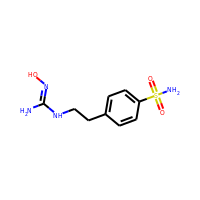
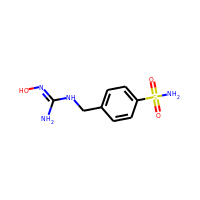
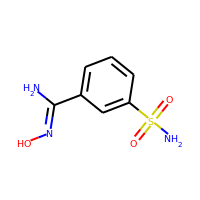
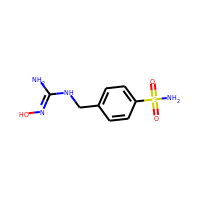
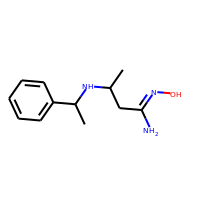

In [22]:
df.head()

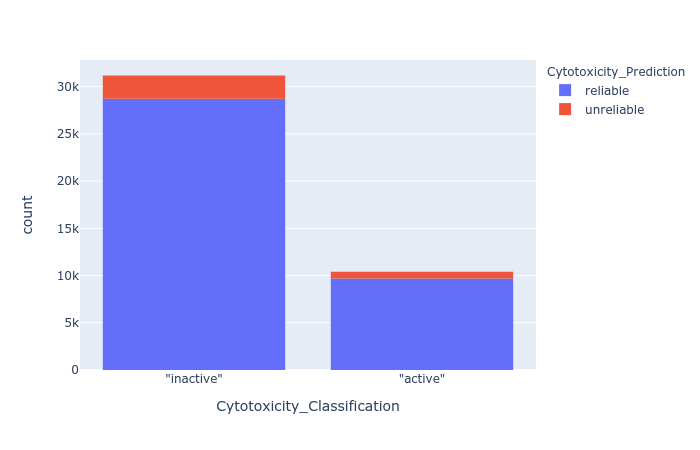

In [23]:
fig = px.histogram(df, x="Cytotoxicity_Classification", color='Cytotoxicity_Prediction')
fig.show()

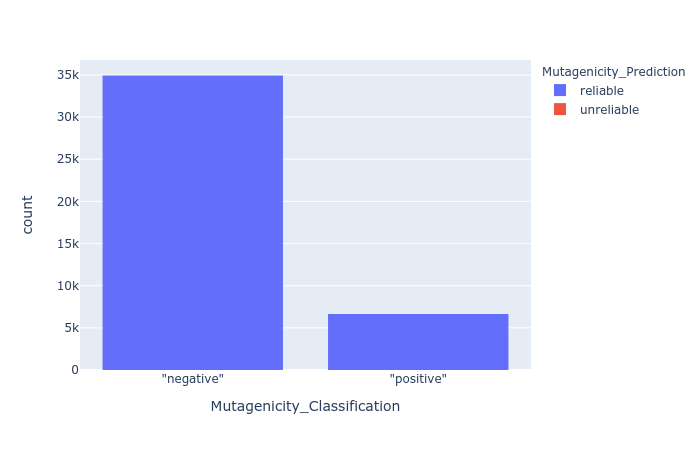

In [24]:
fig = px.histogram(df, x="Mutagenicity_Classification", color='Mutagenicity_Prediction')
fig.show()